<a href="https://colab.research.google.com/github/josuedavendano/lead-levels-nyc-children/blob/master/Josue_Avendano_Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Borough
Bronx            243
Brooklyn         385
Manhattan        322
Queens           348
Staten Island     77
Name: Drinking Fountains, dtype: int64


Text(0.5, 1.0, 'Number of Drinking Fountains in Playgrounds')

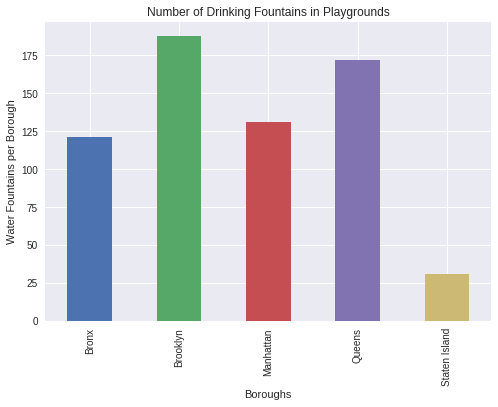

In [0]:
#Josue Avendano
#Data Prep/Cleaning
#Data Set: Drinking Fountains (from NYC OpenData)
import folium 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('Drinking_Fountains.csv')

#replacing borough keys with borough names
data['Borough'] = data['Borough'].map({'B': 'Brooklyn','Q':'Queens','M':'Manhattan','X':'Bronx','R':'Staten Island'})

#counting how many fountains per borough
numFountains = data.groupby('Borough')['Drinking Fountains'].count()
print(numFountains)

#replacing values in site name
data.loc[data['Site Name'].str.contains('playground', case = False),'Site Name'] = 'Playground'
data.loc[data['Site Name'].str.contains('plgd', case = False),'Site Name'] = 'Playground'
data.loc[data['Site Name'].str.contains('p/g', case = False),'Site Name'] = 'Playground'
data.loc[data['Site Name'].str.contains('park', case = False),'Site Name']= 'Park'
data.loc[data['Site Name'].str.contains('field', case = False),'Site Name'] = 'Field'
data.loc[data['Site Name'].str.contains('beach', case = False),'Site Name'] = 'Beach'
data.loc[data['Site Name'].str.contains('triangle', case = False),'Site Name'] = 'Plaza'
data.loc[data['Site Name'].str.contains('square', case = False),'Site Name'] = 'Plaza'
data.loc[data['Site Name'].str.contains('rec', case = False),'Site Name'] = 'Recreation Center'
data.loc[data['Site Name'].str.contains('plaza', case = False),'Site Name'] = 'Plaza'

#creating filter for playground
is_pg = data['Site Name'] == 'Playground'
data_pg = data[is_pg]

#ploting fountains in playgrounds
num_of_pg.plot(kind = "bar")
plt.xlabel("Boroughs")
plt.ylabel("Water Fountains per Borough")
plt.title("Number of Drinking Fountains in Playgrounds")



Text(0.5, 1.0, 'Total Number of Drinking Fountains in New York')

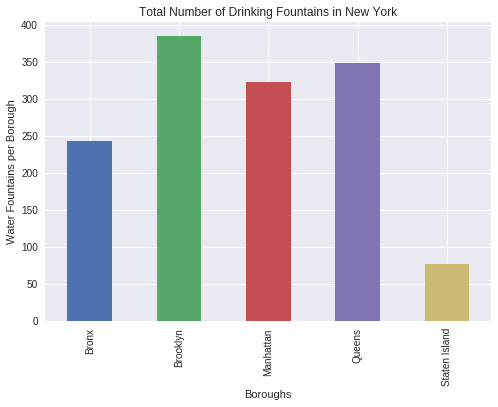

In [0]:
#plotting fountains in total
numFountains.plot(kind = "bar")
plt.xlabel("Boroughs")
plt.ylabel("Water Fountains per Borough")
plt.title("Total Number of Drinking Fountains in New York")

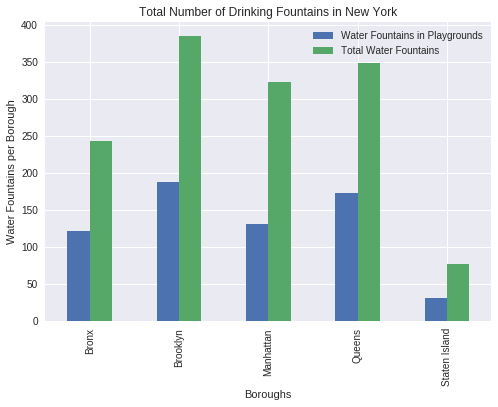

In [0]:

#last graph with both playground and total per borough
both=pd.concat([num_of_pg,numFountains],axis=1,join='inner')
both.plot(kind='bar')
plt.xlabel("Boroughs")
plt.ylabel("Water Fountains per Borough")
plt.title("Total Number of Drinking Fountains in New York")
my_labels = ["Water Fountains in Playgrounds","Total Water Fountains"]
plt.legend(labels=my_labels)

In [0]:
folium_map

In [0]:
folium_map = folium.Map(location=[40.738, -73.98],
zoom_start=10,
tiles="CartoDB dark_matter")

lat = [40.723797, 40.661581, 40.585961, 40.769096, 40.842272]
long = [-73.866095, -73.949798, -74.131700, -73.976238, -73.884605]

count = 0

for num in numFountains:
    radius = num/8
    if num > 50: #staten island
      color ="#99ff0b"
    if num > 200: #bronx
        color="#ffb3ff"
    if num > 300: #manhattan and queens 
        color="#ffe699" # teal
    if num > 350:
      color ="#99e6ff"
    folium.CircleMarker(location=(lat[count],long[count]),radius=radius, color=color, fill=True).add_to(folium_map)
    count += 1